In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import date

In [121]:
#Data Preparation
df = pd.read_csv('daily-treasury-rates-2019-2024.csv', parse_dates=['Date'])
y10 = df['10 Yr']
df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2019-01-02,2.40,2.40,2.42,NaN,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1,2019-01-03,2.42,2.42,2.41,NaN,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
2,2019-01-04,2.40,2.42,2.42,NaN,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
3,2019-01-07,2.42,2.42,2.45,NaN,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
4,2019-01-08,2.40,2.42,2.46,NaN,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00


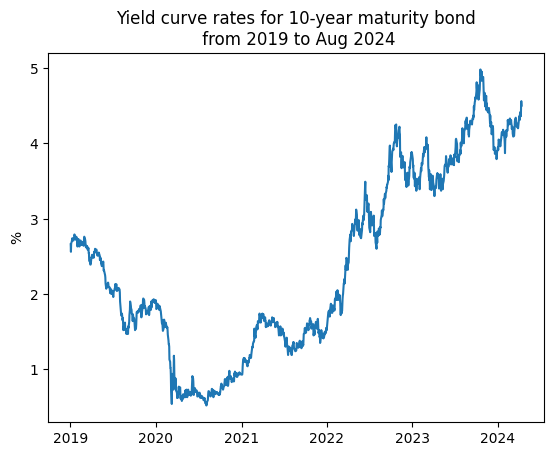

In [122]:
plt.plot(df['Date'], y10)
plt.title('Yield curve rates for 10-year maturity bond\n from 2019 to Aug 2024')
plt.ylabel('%')
plt.show()

In [123]:
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)

n_input = 10      
 
df_min_model_data = y10
 
X, y = Sequential_Input_LSTM(df_min_model_data, n_input)

In [124]:
# Training data
x_train, y_train = X[:925], y[:925]
 
# Test data
x_test, y_test = X[925:], y[925:]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_train.shape)

(925, 1, 10) (925,) (387, 1, 10) (925,)


In [125]:
#Model Building
from tensorflow.keras.layers import Dense,LSTM, Activation
from tensorflow.keras.models import Sequential

# Model defination

model = Sequential()
model.add(LSTM(32, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')

2024-04-15 23:21:01.587335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-15 23:21:01.588395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-15 23:21:01.589714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [126]:
history = model.fit(x_train, y_train,epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=2, workers=3, use_multiprocessing=True)

Epoch 1/100


2024-04-15 23:21:01.849288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-15 23:21:01.852045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-15 23:21:01.853166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 2s - loss: 1.2916 - val_loss: 2.1542 - 2s/epoch - 53ms/step
Epoch 2/100


2024-04-15 23:21:03.105923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-15 23:21:03.106969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-15 23:21:03.107718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 - 0s - loss: 0.3067 - val_loss: 0.9542 - 64ms/epoch - 2ms/step
Epoch 3/100
29/29 - 0s - loss: 0.1433 - val_loss: 0.8588 - 71ms/epoch - 2ms/step
Epoch 4/100
29/29 - 0s - loss: 0.1027 - val_loss: 0.6586 - 74ms/epoch - 3ms/step
Epoch 5/100
29/29 - 0s - loss: 0.0937 - val_loss: 0.6166 - 60ms/epoch - 2ms/step
Epoch 6/100
29/29 - 0s - loss: 0.0886 - val_loss: 0.5423 - 62ms/epoch - 2ms/step
Epoch 7/100
29/29 - 0s - loss: 0.0840 - val_loss: 0.4844 - 62ms/epoch - 2ms/step
Epoch 8/100
29/29 - 0s - loss: 0.0791 - val_loss: 0.5046 - 59ms/epoch - 2ms/step
Epoch 9/100
29/29 - 0s - loss: 0.0752 - val_loss: 0.4085 - 62ms/epoch - 2ms/step
Epoch 10/100
29/29 - 0s - loss: 0.0722 - val_loss: 0.4267 - 61ms/epoch - 2ms/step
Epoch 11/100
29/29 - 0s - loss: 0.0702 - val_loss: 0.3841 - 56ms/epoch - 2ms/step
Epoch 12/100
29/29 - 0s - loss: 0.0674 - val_loss: 0.4225 - 59ms/epoch - 2ms/step
Epoch 13/100
29/29 - 0s - loss: 0.0639 - val_loss: 0.4046 - 58ms/epoch - 2ms/step
Epoch 14/100
29/29 - 0s - loss: 0.06

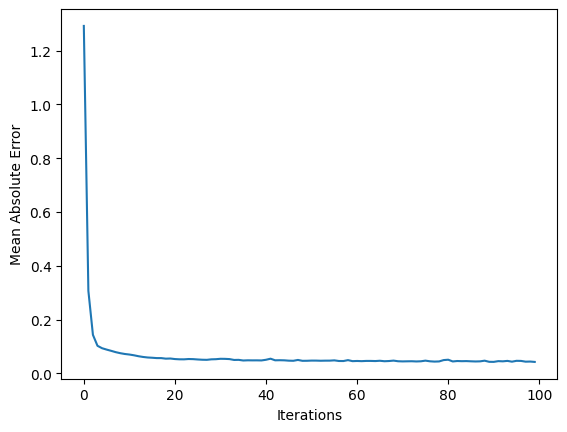

In [127]:
#Plot the loss curve
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.show()

In [128]:
from math import sqrt 
from sklearn.metrics import mean_squared_error

In [129]:
#Prediction
preds = model.predict(x_test)

X_test = x_test.reshape((x_test.shape[0], x_test.shape[2]))
print(X_test.shape)
# invert scaling for forecast
inv_yhat = np.concatenate((X_test[:, :], preds), axis=1)
print(inv_yhat.shape)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((X_test[:, :], y_test), axis=1)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse =sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

13/13 [==============================] - 0s 769us/step
(387, 10)
(387, 11)
Test RMSE: 0.253


2024-04-15 23:21:10.191607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-15 23:21:10.193002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-15 23:21:10.193821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [130]:
df2 = pd.DataFrame({'Predicted yield': inv_yhat, 'Real yield': inv_y})

In [131]:
df2

,Predicted yield,Real yield
0,3.573445,3.88
1,3.692320,3.97
2,3.784906,3.72
3,3.653982,3.76
4,3.640678,3.83
...,...,...
382,4.073105,4.42
383,4.093178,4.36
384,4.070597,4.55
385,4.176313,4.56


Text(0, 0.5, '%')

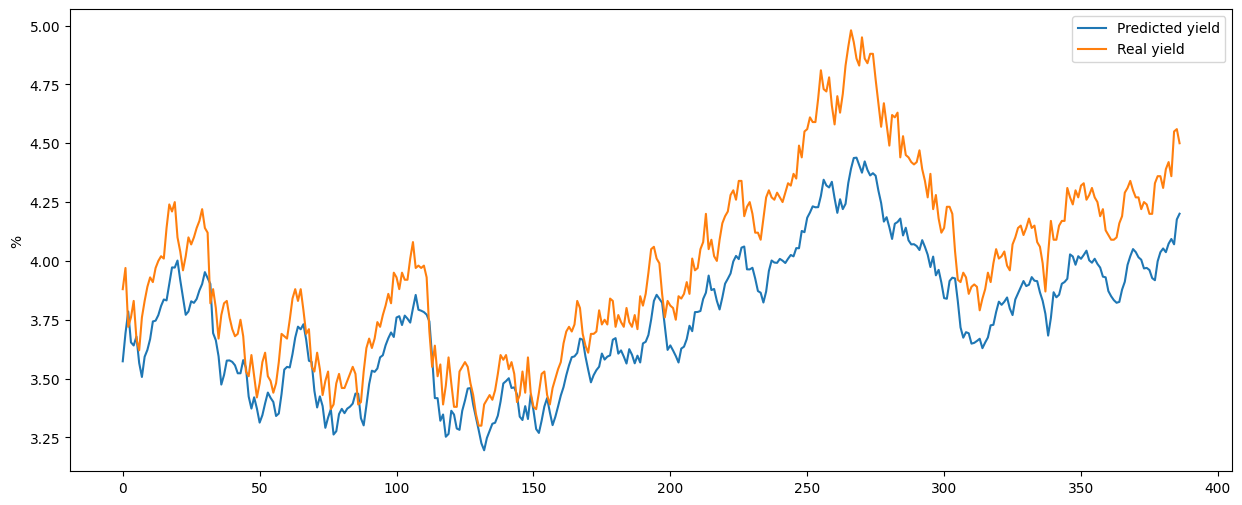

In [132]:
#Plot the result
df2.plot(figsize = (15,6))
plt.xticks()
plt.ylabel('%')